In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("200_selection.csv")

In [3]:
df

,Home Team,Away Team,Result,Home Team Goals Scored,Away Team Goals Scored,Home Team Possession %,Away Team Possession %,Winning Team Possession Difference %,Home Team Off Target Shots,Away Team Off Target Shots,...,Home Team Goals Conceeded,Away Team Goals Conceeded,year,Half Time Score,Score,Match Excitement,Home Team Rating,Away Team Rating,Home Team Aerials Won,Away Team Aerials Won
0,0,1,Home Team,2,0,57,43,33,7,5,...,0,2,2014,1-0,2-0,5.3,7.1,5.5,7,13
1,0,1,Home Team,3,1,44,56,-21,3,12,...,1,3,2014,1-0,03-Jan,6.2,6.4,5.5,20,15
2,0,1,Home Team,2,0,47,53,-11,7,7,...,0,2,2014,0-0,2-0,4.4,6.5,5.6,20,19
3,0,1,Home Team,1,0,41,59,-31,3,3,...,0,1,2014,1-0,1-0,3.5,7.9,4.4,9,18
4,0,1,Home Team,2,0,56,44,27,6,3,...,0,2,2014,1-0,2-0,4.4,7.7,5.1,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,2,2,Tie,1,1,61,39,-36,4,4,...,1,1,2015,0-1,01-Jan,3.5,6.6,6.8,20,25
596,2,2,Tie,0,0,31,69,123,5,11,...,0,0,2015,0-0,0-0,4.4,6.0,6.2,13,13
597,2,2,Tie,1,1,57,43,-25,9,3,...,1,1,2015,44562,01-Jan,5.3,7.0,6.1,21,12
598,2,2,Tie,1,1,60,40,-33,7,2,...,1,1,2015,44562,01-Jan,5.8,7.3,5.8,9,10


We will use the radar chart and line segment chart

# Task 4, PCA

In this task, we will select 10 dimensions from our selected object type

We can see below that our dataframe has 40 columns, that's plenty of dimensions! 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 42 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Home Team                             600 non-null    int64  
 1   Away Team                             600 non-null    int64  
 2   Result                                600 non-null    object 
 3   Home Team Goals Scored                600 non-null    int64  
 4   Away Team Goals Scored                600 non-null    int64  
 5   Home Team Possession %                600 non-null    int64  
 6   Away Team Possession %                600 non-null    int64  
 7   Winning Team Possession Difference %  600 non-null    int64  
 8   Home Team Off Target Shots            600 non-null    int64  
 9   Away Team Off Target Shots            600 non-null    int64  
 10  Home Team On Target Shots             600 non-null    int64  
 11  Away Team On Target

Let's select the top 10 most valuable dimensions, which are dimensions that will influence the outcome of a team winning or not the most. We decided the most important dimensions from the half-time screen shown in all soccer games, as those are likely the most important stats.

    1: Home Team Possession %
    2: Away Team Possession %
    3: Home Team Pass Success %
    4: Away Team Pass Success %
    5: Home Team On Target Shots
    6: Away Team On Target Shots
    7: Home Team Blocked Shots
    8: Away Team blocked Shots
    9: Home Team Corners
    10: Away Team Corners
    
Let's select the columns and create a new dataframe called df2 out of them.

In [5]:
selected_columns = df[["Home Team Possession %","Away Team Possession %", "Home Team Pass Success %", "Away Team Pass Success %", 
                       "Home Team On Target Shots", "Away Team On Target Shots", 
                       "Home Team Blocked Shots", "Away Team Blocked Shots", "Home Team Corners",
                       "Away Team Corners", "Home Team"]]
df2 = selected_columns.copy()
df2

,Home Team Possession %,Away Team Possession %,Home Team Pass Success %,Away Team Pass Success %,Home Team On Target Shots,Away Team On Target Shots,Home Team Blocked Shots,Away Team Blocked Shots,Home Team Corners,Away Team Corners,Home Team
0,57,43,89,83,5,4,8,1,2,0,0
1,44,56,78,86,4,4,0,4,0,10,0
2,47,53,81,84,5,2,3,5,3,9,0
3,41,59,78,87,5,1,1,8,4,7,0
4,56,44,90,82,7,1,5,5,4,6,0
...,...,...,...,...,...,...,...,...,...,...,...
595,61,39,78,62,1,3,8,1,3,3,2
596,31,69,60,81,5,6,4,8,4,4,2
597,57,43,78,74,5,2,6,4,12,4,2
598,60,40,86,75,8,4,5,2,10,3,2


In the following dataframe above, we have our 10 selected features, and 1 selected target which is the column "Home Team". It has three possible values: value 0 means Home Team won the game, 1 means Home Team lost the game, and a 2 means Home Team and Away Team.

In order to perform an accurate PCA, we must first standardize the data. PCA is affected by the scale of our numbers, for example the Home Team Possession % column has numbers that range from 0 - 100, while in a column like Home Team Blocked Shots the values typically range between 1 - 10. Those two ranges are different enough to where it will negatively affect our PCA. 

In our case this means transforming the values in each column to where the mean of each column is 0 and the variance is 1, this is called transforming our data onto a **unit scale**.

In [6]:
from sklearn.preprocessing import StandardScaler

# Get the list of dimensions we have in the dataframe, not including our target.
dimensions = ["Home Team Possession %","Away Team Possession %", "Home Team Pass Success %", "Away Team Pass Success %", 
                       "Home Team On Target Shots", "Away Team On Target Shots", 
                       "Home Team Blocked Shots", "Away Team Blocked Shots", "Home Team Corners",
                       "Away Team Corners"]
# Set the features to an array x
x = df2.loc[:, dimensions].values

# Set the target to an array y
y = df2.loc[:,['Home Team']].values

# Standardize the feature array
x = StandardScaler().fit_transform(x)

# Convert the array x into a dataframe to visualize it
feature_df = pd.DataFrame(x, columns = ["Home Team Possession %", "Away Team Possession %", "Home Team Pass Success %", "Away Team Pass Success %", 
                       "Home Team On Target Shots", "Away Team On Target Shots", 
                       "Home Team Blocked Shots", "Away Team Blocked Shots", "Home Team Corners",
                       "Away Team Corners"])

In [7]:
# Output the standardized dimensions
feature_df

,Home Team Possession %,Away Team Possession %,Home Team Pass Success %,Away Team Pass Success %,Home Team On Target Shots,Away Team On Target Shots,Home Team Blocked Shots,Away Team Blocked Shots,Home Team Corners,Away Team Corners
0,0.607515,-0.607515,1.509771,0.710694,0.215967,0.013600,1.905949,-0.997810,-1.343474,-1.741188
1,-0.628108,0.628108,-0.133449,1.155032,-0.203386,0.013600,-1.618147,0.601529,-2.022855,2.139617
2,-0.342965,0.342965,0.314702,0.858807,0.215967,-0.893080,-0.296611,1.134642,-1.003784,1.751536
3,-0.913252,0.913252,-0.133449,1.303145,0.215967,-1.346421,-1.177635,2.733982,-0.664094,0.975376
4,0.512467,-0.512467,1.659154,0.562581,1.054673,-1.346421,0.584413,1.134642,-0.664094,0.587295
...,...,...,...,...,...,...,...,...,...,...
595,0.987706,-0.987706,-0.133449,-2.399672,-1.461445,-0.439740,1.905949,-0.997810,-1.003784,-0.576946
596,-1.863732,1.863732,-2.822355,0.414469,0.215967,0.920281,0.143901,2.733982,-0.664094,-0.188866
597,0.607515,-0.607515,-0.133449,-0.622320,0.215967,-0.893080,1.024925,0.601529,2.053427,-0.188866
598,0.892658,-0.892658,1.061620,-0.474207,1.474026,0.013600,0.584413,-0.464697,1.374047,-0.576946


Now that we have a standardized feature set, let's begin the PCA.

We can use scikit-learns PCA library.

In [8]:
from sklearn.decomposition import PCA

# Set number of PC's to 2
pca = PCA(n_components=10)

# Transform the feature array x into 2 principal components
principal_components = pca.fit_transform(x)

# Create a new dataframe with the two created PC's
principal_df = pd.DataFrame(data = principal_components, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'
                                                                   ,'PC7', 'PC8', 'PC9', 'PC10'])

Let's visualize our 10 dimensions shrunk down into just 2 PC's

In [9]:
principal_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,1.717611,1.608229,-0.252645,0.949634,-0.708040,-1.734232,0.771992,1.557932,0.012924,7.124620e-15
1,-2.783342,0.597808,1.083469,-1.100232,1.383586,-0.781341,0.760289,-0.453535,0.187933,4.423402e-17
2,-1.363855,-0.103059,1.515751,-1.422689,0.051462,-0.737778,0.769315,-0.186463,0.032884,8.094478e-18
3,-2.375058,-0.124124,2.020335,-2.106445,-0.661490,-0.286087,-0.865940,0.230150,-0.000306,-3.725186e-17
4,0.900028,0.356521,2.105121,-1.309220,-0.406540,-1.084957,0.534157,0.426800,-0.204859,-3.632544e-17
...,...,...,...,...,...,...,...,...,...,...
595,2.012651,-1.060556,-2.485015,-0.480694,0.660112,-0.911558,1.127527,1.316959,-0.413495,-6.783116e-18
596,-3.636066,-1.384496,0.335977,0.091090,-0.979149,1.459191,-0.752219,2.234387,0.211661,8.270533e-17
597,1.716301,-1.471333,0.198917,-0.368378,-1.245231,0.628515,-0.453719,-0.368698,0.280719,4.444068e-17
598,2.459982,0.129568,0.884993,0.671760,-0.258866,0.656435,-0.051162,-0.286907,-0.106071,2.834206e-17


Finally, lets add back our target column to our PC dataframe

In [10]:
final_df = pd.concat([principal_df, df[['Home Team']]], axis = 1)
final_df.rename(columns = {'Home Team' : 'Home Team Result'}, inplace = True)
final_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Home Team Result
0,1.717611,1.608229,-0.252645,0.949634,-0.708040,-1.734232,0.771992,1.557932,0.012924,7.124620e-15,0
1,-2.783342,0.597808,1.083469,-1.100232,1.383586,-0.781341,0.760289,-0.453535,0.187933,4.423402e-17,0
2,-1.363855,-0.103059,1.515751,-1.422689,0.051462,-0.737778,0.769315,-0.186463,0.032884,8.094478e-18,0
3,-2.375058,-0.124124,2.020335,-2.106445,-0.661490,-0.286087,-0.865940,0.230150,-0.000306,-3.725186e-17,0
4,0.900028,0.356521,2.105121,-1.309220,-0.406540,-1.084957,0.534157,0.426800,-0.204859,-3.632544e-17,0
...,...,...,...,...,...,...,...,...,...,...,...
595,2.012651,-1.060556,-2.485015,-0.480694,0.660112,-0.911558,1.127527,1.316959,-0.413495,-6.783116e-18,2
596,-3.636066,-1.384496,0.335977,0.091090,-0.979149,1.459191,-0.752219,2.234387,0.211661,8.270533e-17,2
597,1.716301,-1.471333,0.198917,-0.368378,-1.245231,0.628515,-0.453719,-0.368698,0.280719,4.444068e-17,2
598,2.459982,0.129568,0.884993,0.671760,-0.258866,0.656435,-0.051162,-0.286907,-0.106071,2.834206e-17,2


The above looks good, but let's remap those 0, 1 and 2 values to win, loss and tie to make things more clear.

In [11]:
def renameClass(x):
    if x == 0:
        return 'Win'
    elif x == 1:
        return 'Loss'
    else:
        return 'Tie'
final_df["Home Team Result"] = final_df["Home Team Result"].map(renameClass)
final_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Home Team Result
0,1.717611,1.608229,-0.252645,0.949634,-0.708040,-1.734232,0.771992,1.557932,0.012924,7.124620e-15,Win
1,-2.783342,0.597808,1.083469,-1.100232,1.383586,-0.781341,0.760289,-0.453535,0.187933,4.423402e-17,Win
2,-1.363855,-0.103059,1.515751,-1.422689,0.051462,-0.737778,0.769315,-0.186463,0.032884,8.094478e-18,Win
3,-2.375058,-0.124124,2.020335,-2.106445,-0.661490,-0.286087,-0.865940,0.230150,-0.000306,-3.725186e-17,Win
4,0.900028,0.356521,2.105121,-1.309220,-0.406540,-1.084957,0.534157,0.426800,-0.204859,-3.632544e-17,Win
...,...,...,...,...,...,...,...,...,...,...,...
595,2.012651,-1.060556,-2.485015,-0.480694,0.660112,-0.911558,1.127527,1.316959,-0.413495,-6.783116e-18,Tie
596,-3.636066,-1.384496,0.335977,0.091090,-0.979149,1.459191,-0.752219,2.234387,0.211661,8.270533e-17,Tie
597,1.716301,-1.471333,0.198917,-0.368378,-1.245231,0.628515,-0.453719,-0.368698,0.280719,4.444068e-17,Tie
598,2.459982,0.129568,0.884993,0.671760,-0.258866,0.656435,-0.051162,-0.286907,-0.106071,2.834206e-17,Tie


Let's now plot the percentage of explained variance vs the principal component to select the best 2 PC's that best capture the data.

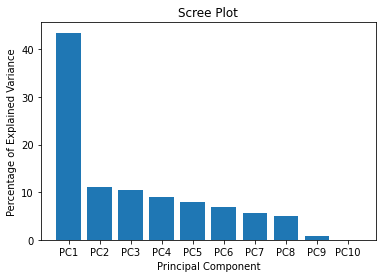

In [12]:
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

We can see PC1 captures about 40% of the data, and PC2 about 12%, let's select those two for our final plot. Sadly these PC's only contain appoxamately 52% of the variance in the data, it's not a very accurate representation of the data.

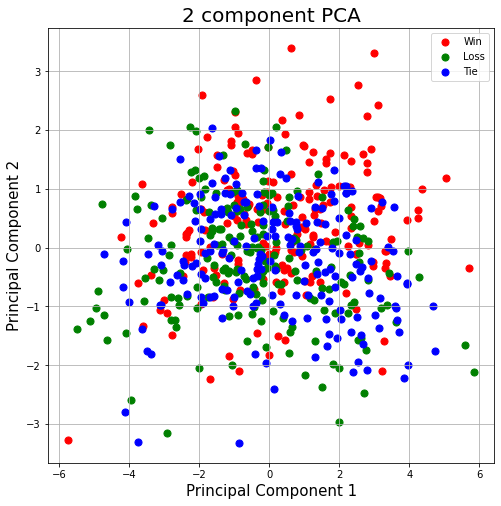

In [13]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ["Win", "Loss", "Tie"]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = final_df['Home Team Result'] == target
    ax.scatter(final_df.loc[indicesToKeep, 'PC1']
               , final_df.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [15]:
final_df = final_df.drop(['PC3', 'PC4', 'PC5', 'PC6','PC7', 'PC8', 'PC9', 'PC10', 'Home Team Result'], axis = 1)
final_df.to_csv('216168486-216442428-212298535—T4.csv')